In [1]:
!pip install chart-studio
!pip install cufflinks
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

## Get Information about the data

In [4]:
df = pd.read_csv('DataSet1.csv');

In [5]:
df.shape

(468, 6)

In [6]:
df.head(10)

,Device_id,time,RPM,Total_rotations,On_time,Off_time
0,1,11-05-2023 00:01,10,10,1,0
1,1,11-05-2023 00:02,15,25,2,0
2,1,11-05-2023 00:03,15,40,3,0
3,1,11-05-2023 00:04,15,55,4,0
4,1,11-05-2023 00:05,15,70,5,0
5,1,11-05-2023 00:06,14,84,6,0
6,1,11-05-2023 00:07,16,100,7,0
7,1,11-05-2023 00:08,15,115,8,0
8,1,11-05-2023 00:09,15,130,9,0
9,1,11-05-2023 00:10,15,145,10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Device_id        468 non-null    int64 
 1   time             468 non-null    object
 2   RPM              468 non-null    int64 
 3   Total_rotations  468 non-null    int64 
 4   On_time          468 non-null    int64 
 5   Off_time         468 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 22.1+ KB


In [8]:
df.describe()

,Device_id,RPM,Total_rotations,On_time,Off_time
count,468.00000,468.000000,468.000000,468.000000,468.000000
mean,2.00000,13.235043,1100.660256,70.929487,7.570513
std,0.81737,6.386238,654.172650,38.240775,10.626688
min,1.00000,0.000000,10.000000,1.000000,0.000000
25%,1.00000,12.000000,587.500000,39.750000,0.000000
50%,2.00000,15.000000,977.000000,75.000000,5.000000
75%,3.00000,17.000000,1568.250000,103.000000,7.000000
max,3.00000,20.000000,2420.000000,147.000000,31.000000


In [9]:
df.columns

Index(['Device_id', 'time', 'RPM', 'Total_rotations', 'On_time', 'Off_time'], dtype='object')

In [10]:
changeName = {
    'Device_id' : 'ID',
    'time' : 'TIME',
    'RPM' :'RPM',
    'Total_rotations':'T_ROTATION',
    'On_time' : 'ONt',
    'Off_time':'OFt'
}

In [11]:
df = df.rename(columns = changeName)

In [12]:
# change the time into proper format

df['TIME'] = pd.to_datetime(df['TIME'])

# change the datetime object into spacific format
# ( YYYY, MM, DD ) + ( HH, MM, SS )

df['TIME'] = df['TIME'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [13]:
# updated DataFrame 

df.head(10)

,ID,TIME,RPM,T_ROTATION,ONt,OFt
0,1,2023-11-05 00:01:00,10,10,1,0
1,1,2023-11-05 00:02:00,15,25,2,0
2,1,2023-11-05 00:03:00,15,40,3,0
3,1,2023-11-05 00:04:00,15,55,4,0
4,1,2023-11-05 00:05:00,15,70,5,0
5,1,2023-11-05 00:06:00,14,84,6,0
6,1,2023-11-05 00:07:00,16,100,7,0
7,1,2023-11-05 00:08:00,15,115,8,0
8,1,2023-11-05 00:09:00,15,130,9,0
9,1,2023-11-05 00:10:00,15,145,10,0


In [14]:
# Check the Min and Max data avaiable in the dataset

min_time = df['TIME'].min()
max_time = df['TIME'].max()

print(' First Date is : ', min_time)
print(' Last Date is : ',max_time)

 First Date is :  2023-11-05 00:01:00
 Last Date is :  2023-11-05 02:35:00


In [15]:
"""
** CONCLUSION

As there are ~2:30 hrs of data for each device Check for individual device

""" 


# check How many products are there
# result is into Numpy array

unique_ids = df['ID'].unique()

print('Unique Ids')
print(unique_ids)


Unique Ids
[1 2 3]


In [16]:
# split the dataframe into prodcuct wise format by GroupBy function

groupby_ID_df = df.groupby('ID')


In [17]:
# Evalute the GroupBy data

Available_Ids = []

for group_name, group_data in groupby_ID_df:
    
    Available_Ids.append(group_name)
    print('Group Name ', group_name)
    print(group_data)
    print("*"*50)
    
    
print("Available IDs : ")
print(Available_Ids)

# we can use get_group( <any id> )
# try:
#     specific_group = grouped_df.get_group(wrong_group_name)
#     print(specific_group)
# except KeyError:
#     print(f"Group {wrong_group_name} does not exist.")

Group Name  1
     ID                 TIME  RPM  T_ROTATION  ONt  OFt
0     1  2023-11-05 00:01:00   10          10    1    0
1     1  2023-11-05 00:02:00   15          25    2    0
2     1  2023-11-05 00:03:00   15          40    3    0
3     1  2023-11-05 00:04:00   15          55    4    0
4     1  2023-11-05 00:05:00   15          70    5    0
..   ..                  ...  ...         ...  ...  ...
151   1  2023-11-05 02:31:00   15        2143  145    7
152   1  2023-11-05 02:32:00   10        2153  146    7
153   1  2023-11-05 02:33:00    0        2153  146    8
154   1  2023-11-05 02:34:00    0        2153  146    9
155   1  2023-11-05 02:35:00    7        2160  147    9

[156 rows x 6 columns]
**************************************************
Group Name  2
     ID                 TIME  RPM  T_ROTATION  ONt  OFt
156   2  2023-11-05 00:01:00   20          20    1    0
157   2  2023-11-05 00:02:00   20          40    2    0
158   2  2023-11-05 00:03:00   20          60    3    0
1

In [18]:
"""
** CONCLUSION:

We can Put all the IDs into one dropdown list and 
we can select product wise visualization for individual products 

as well as product wise agreegated result like avg,mean,etc..

"""
print()

In [19]:
"""
** OBSERVATION:

- we can find total_rotation_time by following:

total_rotation = RPM x total_rotation_time
total_rotation_time = total_rotation / RMP


- we are given on_time and off_time ( I think it is total time )

total_active_time = on_time - off_time


- Based on Some Conditions 
    - startup or shutdown time
    - acceleration and Deceleration time 
    - time to maintain equalibrium of motor ( assuming this devices have motors)

total_active_time >= total_rotation_time


- In total_rotation_time the motor is working efficently
- this phenomenon can be used to measure eficiency of the motor as well as device

Duty_Cycle = (total_rotation_time/total_active_time)*100

- Duty_Cycle is the percentage of active motor time 
- In what percentage motor perform its Duty or effectiveness of motor's Duty
- It will indicates productivity of motor


- higer Duty_Cycle percentage means motor is more efficent 
- lower Duty_Cycle Percentage means low motor utilization

"""
print()

In [20]:
"""
continue from this.. 
"""
print()

In [21]:
"""
** LIST 


1) agreegated
- AVG RPM , MAX RMP , MIN RPM [ BAR CHART ]  {done}
- Duty_Cycle [ LINE CHART ]
- 

2) Individual

- RMP vs TIME [ LINE CHART + SCATTER PLOT ]
- Duty_Cycle [ SCATTER PLOT ]
- total_rotation vs RPM [ LINE CHART + SCATTER PLOT ]
- On Time and Off time report [ Stacked Area Chart ]
- RPM Distribution chart


"""
print()

In [22]:
"""
agreegated:

agreegated_RPM()           : agreegated_RPM.html
agreegated_duty_cycle()    : agreegated_duty_cycle.html

individual:



"""

'\nagreegated:\n\nagreegated_RPM()           : agreegated_RPM.html\nagreegated_duty_cycle()    : agreegated_duty_cycle.html\n\nindividual:\n\n\n\n'

### Clusterning Applied to the data for data visualization

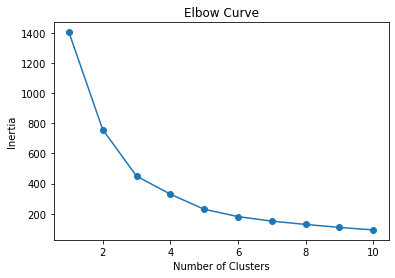

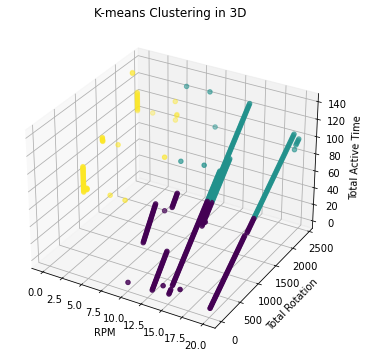

In [23]:


import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data into a pandas DataFrame
data = pd.read_csv('DataSet1.csv')

changeName = {
    'Device_id' : 'ID',
    'time' : 'TIME',
    'RPM' :'RPM',
    'Total_rotations':'T_ROTATION',
    'On_time' : 'ONt',
    'Off_time':'OFt'
}
data = data.rename(columns = changeName)

# Remove any missing values
data.dropna(inplace=True)

# Calculate total_active_time by subtracting off_time from on_time
data['total_active_time'] = data['ONt'] - data['OFt']

# Select the features to be used for clustering
X = data[['RPM', 'T_ROTATION', 'total_active_time']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')

plt.show()

# Based on the elbow curve, choose the appropriate number of clusters
# Let's say we choose k=3

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['Cluster'] = labels

# Visualize the clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of RPM, total_rotation, and total_active_time colored by clusters
ax.scatter(data['RPM'], data['T_ROTATION'], data['total_active_time'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('RPM')
ax.set_ylabel('Total Rotation')
ax.set_zlabel('Total Active Time')
ax.set_title('K-means Clustering in 3D')

plt.show()


In [45]:
# import pandas as pd
# import plotly.express as px
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Load the data into a pandas DataFrame
# data = pd.read_csv('DataSet1.csv')
# changeName = {
#     'Device_id' : 'ID',
#     'time' : 'TIME',
#     'RPM' :'RPM',
#     'Total_rotations':'T_ROTATION',
#     'On_time' : 'ONt',
#     'Off_time':'OFt'
# }
# data = data.rename(columns = changeName)

# # Remove any missing values
# data.dropna(inplace=True)

# # Calculate total_active_time by subtracting off_time from on_time
# data['total_active_time'] = data['ONt'] - data['OFt']

# # Select the features to be used for clustering
# X = data[['RPM', 'T_ROTATION', 'total_active_time']]

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Determine the optimal number of clusters using the elbow method
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)

# # Based on the elbow curve, choose the appropriate number of clusters
# # Let's say we choose k=3

# # Apply k-means clustering with the chosen number of clusters
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X_scaled)

# # Get the cluster labels for each data point
# labels = kmeans.labels_

# # Add the cluster labels to the DataFrame
# data['Cluster'] = labels

# # Visualize the clusters in 3D using Plotly
# fig = px.scatter_3d(
#     data,
#     x='RPM',
#     y='T_ROTATION',
#     z='total_active_time',
#     color='Cluster',
# #     symbol='Cluster',
#     title='3-means Clustering in 3D'
# )
# fig.show()
